In [1]:
import pandas as pd
import numpy as np
import random
from faker import Faker
import hashlib  # Add this import statement
import json
from datetime import datetime


In [2]:

# Initialize Faker to generate fake data
fake = Faker()

# Define the number of entries
num_entries = random.randint(850, 1000)

# Generate dummy data
data = {
    'student_id': [fake.unique.random_int(min=1000, max=9999) for _ in range(num_entries)],
    'name': [fake.name() for _ in range(num_entries)],
    'course': [fake.random_element(elements=('Computer Science', 'Mathematics', 'Physics', 'Biology')) for _ in range(num_entries)],
    'grade': [fake.random_element(elements=('A', 'B', 'C', 'D', 'F')) for _ in range(num_entries)],
    'age': [fake.random_int(min=18, max=25) for _ in range(num_entries)],
    'gender': [fake.random_element(elements=('Male', 'Female')) for _ in range(num_entries)],
    # Add more columns as needed
}

# Create a DataFrame
df = pd.DataFrame(data)


In [3]:
# Feature Engineering
# Example: Create a new feature for GPA based on grade
grades_to_gpa = {'A': 4.0, 'B': 3.0, 'C': 2.0, 'D': 1.0, 'F': 0.0}
df['gpa'] = df['grade'].map(grades_to_gpa)

In [4]:



# Simplified Blockchain
class Block:
    def __init__(self, index, timestamp, data, previous_hash):
        self.index = index
        self.timestamp = timestamp
        self.data = data
        self.previous_hash = previous_hash
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        return hashlib.sha256(str(self.index).encode() + 
                               str(self.timestamp).encode() + 
                               json.dumps(self.data).encode() + 
                               self.previous_hash.encode()).hexdigest()

# Create Blockchain
def create_blocks(df):
    blockchain = []
    for index, row in df.iterrows():
        data = {
            'student_id': row['student_id'],
            'name': row['name'],
            'course': row['course'],
            'grade': row['grade'],
            'age': row['age'],
            'gender': row['gender'],
            # Add more fields as needed
            'gpa': row['gpa']  # Include engineered features
        }
        if index == 0:
            previous_hash = "0"
        else:
            previous_hash = blockchain[-1].hash
        block = Block(index, datetime.now(), data, previous_hash)
        blockchain.append(block)
    return blockchain

blockchain = create_blocks(df)

# Print the first block as an example
first_block = blockchain[0]
print("Index:", first_block.index)
print("Timestamp:", first_block.timestamp)
print("Data:", first_block.data)
print("Previous Hash:", first_block.previous_hash)
print("Hash:", first_block.hash)


Index: 0
Timestamp: 2024-04-27 23:02:50.988804
Data: {'student_id': 8747, 'name': 'Hannah Tyler', 'course': 'Physics', 'grade': 'F', 'age': 24, 'gender': 'Male', 'gpa': 0.0}
Previous Hash: 0
Hash: 556dcdd6a71938bf64e2103d7a3d7e4805e0d15dfbbd78f6009a425652e4ec08


In [31]:

# Print information about the next nodes
for block in blockchain[1:]:
    print("\nNext Block:")
    print("Index:", block.index)
    print("Timestamp:", block.timestamp)
    print("Data:", block.data)
    print("Previous Hash:", block.previous_hash)
    print("Hash:", block.hash)
    
    if block.index== 99:
        


Next Block:
Index: 1
Timestamp: 2024-04-27 23:02:50.988804
Data: {'student_id': 6501, 'name': 'Larry Stone', 'course': 'Computer Science', 'grade': 'C', 'age': 20, 'gender': 'Female', 'gpa': 2.0}
Previous Hash: 556dcdd6a71938bf64e2103d7a3d7e4805e0d15dfbbd78f6009a425652e4ec08
Hash: cd7a5fc992b7e6f5261778d9393336bb239a25ec613f46f0d280720eca4f88d8

Next Block:
Index: 2
Timestamp: 2024-04-27 23:02:50.988804
Data: {'student_id': 3199, 'name': 'Ryan Lopez', 'course': 'Computer Science', 'grade': 'D', 'age': 24, 'gender': 'Male', 'gpa': 1.0}
Previous Hash: cd7a5fc992b7e6f5261778d9393336bb239a25ec613f46f0d280720eca4f88d8
Hash: dca733e28b1d8305d4d7bc03ef51e10c1df435636816ab0a3b74654971a76ea2

Next Block:
Index: 3
Timestamp: 2024-04-27 23:02:50.988804
Data: {'student_id': 7916, 'name': 'Alexandra Johnson', 'course': 'Physics', 'grade': 'B', 'age': 21, 'gender': 'Female', 'gpa': 3.0}
Previous Hash: dca733e28b1d8305d4d7bc03ef51e10c1df435636816ab0a3b74654971a76ea2
Hash: 6a4e83d1705201a81ad8bc15777

In [6]:
print(df.head())


   student_id               name            course grade  age  gender  gpa
0        8747       Hannah Tyler           Physics     F   24    Male  0.0
1        6501        Larry Stone  Computer Science     C   20  Female  2.0
2        3199         Ryan Lopez  Computer Science     D   24    Male  1.0
3        7916  Alexandra Johnson           Physics     B   21  Female  3.0
4        2881      Andrew Knight       Mathematics     F   18  Female  0.0


In [7]:
print(df.columns)


Index(['student_id', 'name', 'course', 'grade', 'age', 'gender', 'gpa'], dtype='object')


In [8]:
# Feature Engineering
# Example: Create a new feature for GPA based on grade
grades_to_gpa = {'A': 4.0, 'B': 3.0, 'C': 2.0, 'D': 1.0, 'F': 0.0}
df['gpa'] = df['grade'].map(grades_to_gpa)


In [9]:

# Example: Create a new feature for age group
age_bins = [18, 20, 23, 25]
age_labels = ['18-20', '21-23', '24-25']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)



In [10]:
# Example: Create a new feature for course type
df['course_type'] = df['course'].apply(lambda x: 'STEM' if 'Science' in x or 'Mathematics' in x else 'Non-STEM')


In [11]:

# Example: Create a new feature for GPA category
gpa_bins = [0, 1.99, 2.99, 3.99, 4.0]
gpa_labels = ['Fail', 'Pass', 'Credit', 'Distinction']  # Adjusted number of labels
df['gpa_category'] = pd.cut(df['gpa'], bins=gpa_bins, labels=gpa_labels, right=False)



In [12]:
# Example: Create a new feature for grade spread
df['grade_spread'] = df.groupby('student_id')['gpa'].transform(lambda x: max(x) - min(x))



In [13]:
# Example: Create a new feature for year of study
current_year = datetime.now().year
df['year_of_study'] = current_year - (18 - df['age'])

# Display the updated DataFrame with engineered features
print(df.head(15))

    student_id               name            course grade  age  gender  gpa  \
0         8747       Hannah Tyler           Physics     F   24    Male  0.0   
1         6501        Larry Stone  Computer Science     C   20  Female  2.0   
2         3199         Ryan Lopez  Computer Science     D   24    Male  1.0   
3         7916  Alexandra Johnson           Physics     B   21  Female  3.0   
4         2881      Andrew Knight       Mathematics     F   18  Female  0.0   
5         1148     Nicholas White       Mathematics     F   20    Male  0.0   
6         4262      Larry Freeman       Mathematics     D   18    Male  1.0   
7         9145    Gregory Johnson  Computer Science     B   21  Female  3.0   
8         3919     Lindsay Taylor           Biology     F   19    Male  0.0   
9         6424     Kimberly Sharp           Biology     B   22  Female  3.0   
10        8992     Patrick Pierce  Computer Science     C   21    Male  2.0   
11        2408      Brenda Montes       Mathematics 

In [14]:
print(df.columns)


Index(['student_id', 'name', 'course', 'grade', 'age', 'gender', 'gpa',
       'age_group', 'course_type', 'gpa_category', 'grade_spread',
       'year_of_study'],
      dtype='object')


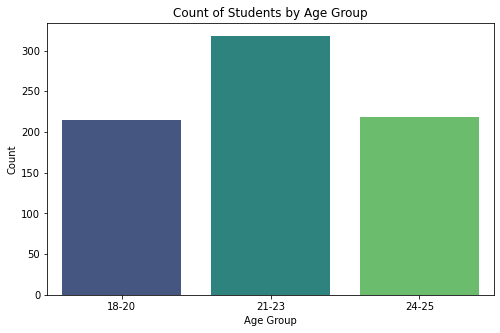

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Plot bar plot of age group
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='age_group', palette='viridis')
plt.title('Count of Students by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


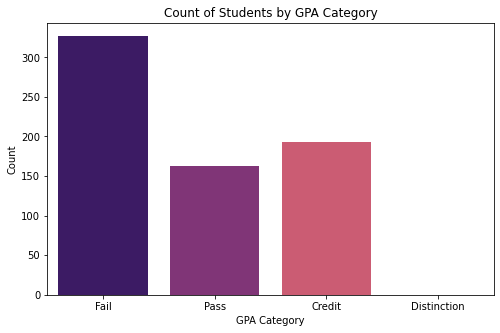

In [16]:

# Plot bar plot of GPA category
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gpa_category', palette='magma')
plt.title('Count of Students by GPA Category')
plt.xlabel('GPA Category')
plt.ylabel('Count')
plt.show()


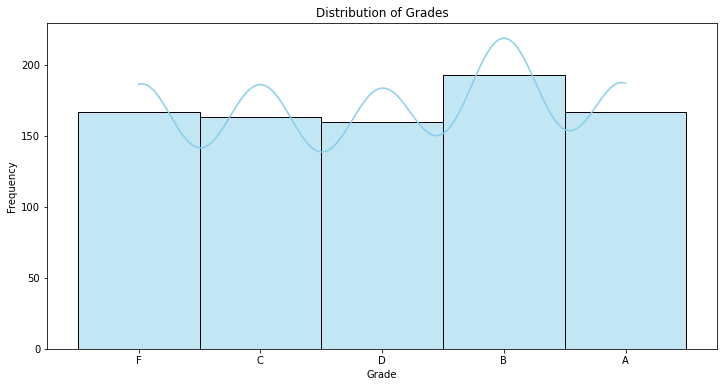

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of grades
plt.figure(figsize=(12, 6))
sns.histplot(df['grade'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()


In [18]:
# Convert non-numeric values in the 'grade' column to NaN
df['grade'] = pd.to_numeric(df['grade'], errors='coerce')

# Calculate Average Grade
df['avg_grade'] = df.groupby('student_id')['grade'].transform('mean')




Text(0.5, 1.0, 'Distribution of Average Grade')

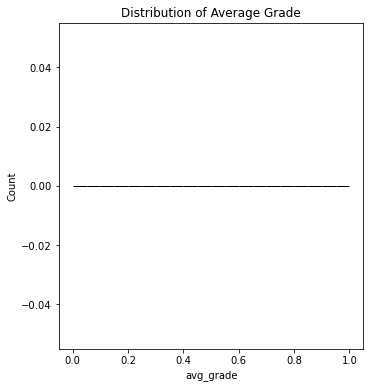

In [19]:
# Plot histograms of average grade and number of courses
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['avg_grade'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Average Grade')


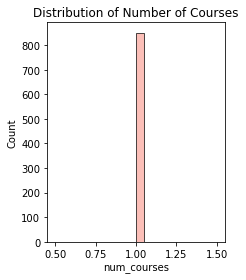

In [20]:



# Calculate Number of Courses
df['num_courses'] = df.groupby('student_id')['course'].transform('nunique')



plt.subplot(1, 2, 2)
sns.histplot(df['num_courses'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Number of Courses')
plt.tight_layout()
plt.show()


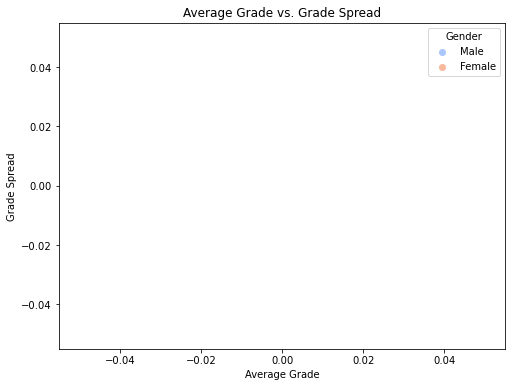

In [21]:

# Calculate Grade Spread
df['grade_spread'] = df.groupby('student_id')['gpa'].transform(lambda x: x.max() - x.min())


# Plot scatter plot of average grade vs. grade spread with gender as hue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='avg_grade', y='grade_spread', hue='gender', palette='coolwarm')
plt.title('Average Grade vs. Grade Spread')
plt.xlabel('Average Grade')
plt.ylabel('Grade Spread')
plt.legend(title='Gender', loc='upper right')
plt.show()


In [22]:
print(df.columns)


Index(['student_id', 'name', 'course', 'grade', 'age', 'gender', 'gpa',
       'age_group', 'course_type', 'gpa_category', 'grade_spread',
       'year_of_study', 'avg_grade', 'num_courses'],
      dtype='object')


In [27]:
print(df_numeric.columns)


Index(['student_id', 'course', 'grade', 'age', 'gpa', 'age_group',
       'course_type', 'gpa_category', 'grade_spread', 'year_of_study',
       'avg_grade', 'num_courses', 'gender_Male'],
      dtype='object')
